Logistic regression is used for classification problems in machine learning. Here we are using sklearn logisticregression class to solve binary classification problem to predict if a customer would buy a life insurance.  Linear regression suitable for, where prediction value is continuous,However Logistic regression is used for classification problems mainly where prediction value is categorical.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


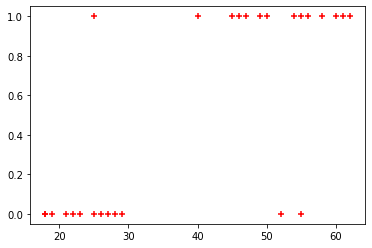

In [4]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [5]:
df.shape

(27, 2)

In [6]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,test_size=0.2)

In [17]:
X_test

,age
2,47
23,45
1,25
12,27
13,29
7,60


In [18]:
X_train

,age
11,28
21,26
3,52
5,56
26,23
18,19
6,55
4,46
22,40
8,62


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
clf=LogisticRegression()

In [21]:
clf.fit(X_train,y_train)

LogisticRegression()

In [22]:
clf.predict(X_test)

array([1, 1, 0, 0, 0, 1], dtype=int64)

In [23]:
clf.score(X_test,y_test)

1.0

In [24]:
clf.predict_proba(X_test)

array([[0.28553428, 0.71446572],
       [0.33407486, 0.66592514],
       [0.82974135, 0.17025865],
       [0.7951796 , 0.2048204 ],
       [0.75566793, 0.24433207],
       [0.08355341, 0.91644659]])

In [26]:
clf.predict([[25]])

array([0], dtype=int64)

In [27]:
clf.predict([[56]])

array([1], dtype=int64)

## Excercise description

1) Now do some exploratory data analysis to figure out which variables have        direct and clear impact on employee retention (i.e. whether they leave the      company or continue to work)
2) Plot bar charts showing impact of employee salaries on retention
3) Plot bar charts showing corelation between department and employee retention
4) Now build logistic regression model using variables that were narrowed down    in step 1
5) Measure the accuracy of the model

In [5]:
df=pd.read_csv('HR_comma_sep.csv')
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [6]:
df.shape

(14999, 10)

In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
left=df[df.left==1]
left.shape

(3571, 10)

In [10]:
Retained=df[df.left==0]
Retained.shape

(11428, 10)

In [11]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**From above table we can draw following conclusions**,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm
However other parameters do not show any difference measurely.    
    

In [12]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<AxesSubplot:xlabel='salary', ylabel='count'>

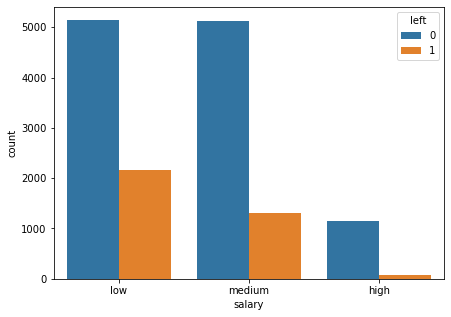

In [13]:
# pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.figure(figsize=(7,5))
sns.countplot(x='salary',hue='left',data=df)

Above bar chart shows employees with high salaries are likely to not leave the company

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

In [15]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='count'>

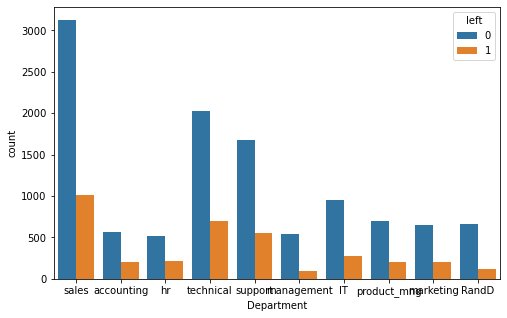

In [16]:
# pd.crosstab(df.Department,df.left).plot(kind='bar')
plt.figure(figsize=(8,5))
sns.countplot(x='Department',hue='left',data=df)

**looking for the correlation**

<AxesSubplot:>

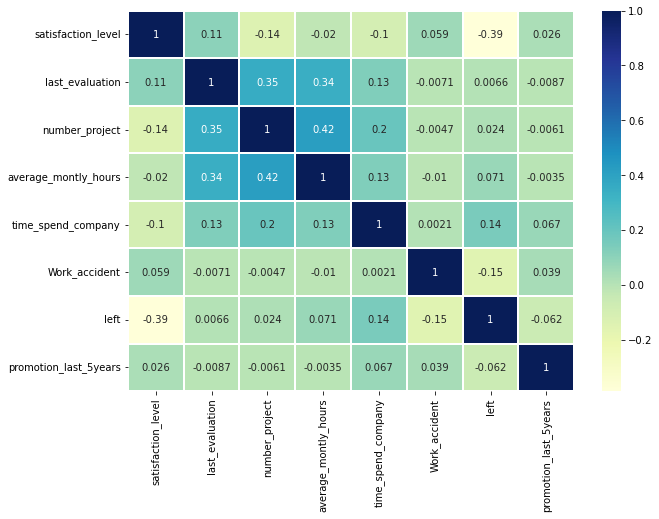

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",linewidths=0.2)

In [18]:
df['satisfaction_level'].value_counts()

0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.26     30
0.12     30
Name: satisfaction_level, Length: 92, dtype: int64

<AxesSubplot:xlabel='satisfaction_level', ylabel='count'>

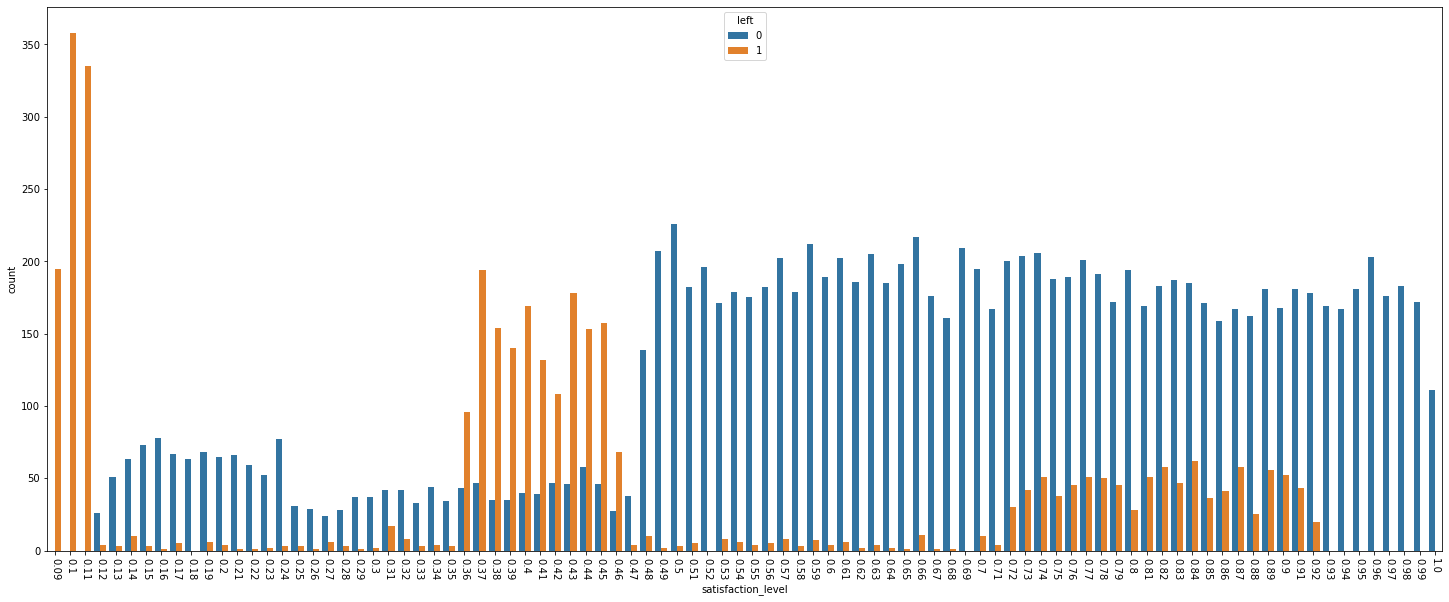

In [19]:
plt.figure(figsize=(25, 10))
plt.xticks(rotation=-90)
sns.countplot(x='satisfaction_level',hue='left',data=df)

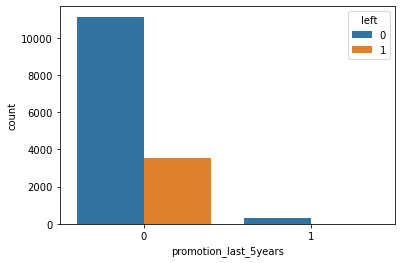

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x='promotion_last_5years',hue='left',data=df)
plt.show()

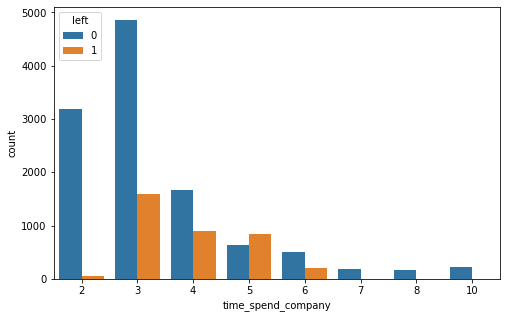

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='time_spend_company',hue='left',data=df)
plt.show()

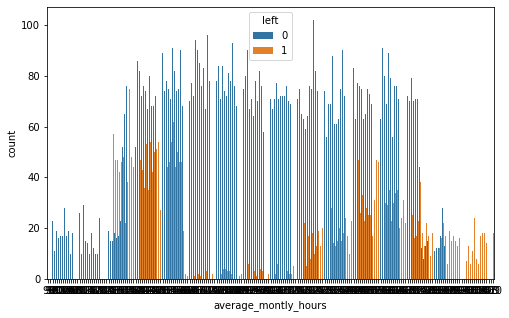

In [128]:
plt.figure(figsize=(8,5))
sns.countplot(x='average_montly_hours',hue='left',data=df)
plt.show()

In [127]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

### From the data analysis so far we can conclude that we will use following variables as independant variables in our model
- **Satisfaction Level**
- **Average Monthly Hours**
- **Promotion Last 5 Years**
- **Salary**

In [71]:
df_sub = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df_sub.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


**Tackle salary dummy variable**

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [72]:
dummie=pd.get_dummies(df_sub['salary'],prefix='salary')
dummie.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [75]:
merge=pd.concat([df_sub,dummie],axis='columns')
merge.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [76]:
merge.drop('salary',axis='columns',inplace=True)
merge.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [77]:
X=merge
y=df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

### Spliting the data for training the model

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)
X_train.shape

(11999, 6)

In [104]:
y_test.shape

(3000,)

In [105]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [106]:
clf.fit(X_train,y_train)

LogisticRegression()

In [107]:
clf.predict(X_test)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

**Acuracy of the model**

In [108]:
clf.score(X_test,y_test)

0.7826666666666666

In [132]:
clf.predict_proba(X_test)

array([[0.25099262, 0.74900738],
       [0.85414159, 0.14585841],
       [0.27183425, 0.72816575],
       ...,
       [0.94922149, 0.05077851],
       [0.82009893, 0.17990107],
       [0.91084248, 0.08915752]])